<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [158]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [200]:
address = df['INSTRUCTION_EXPENDITURE']/df['TOTAL_EXPENDITURE']
  
# Using 'Address' as the column name 
# and equating it to the list 
df['Hold'] = address 

hold2 = (df['AVG_MATH_4_SCORE'] + df['AVG_MATH_8_SCORE'] + df['AVG_READING_4_SCORE'] + df['AVG_READING_8_SCORE'])/4

df['Hold2'] = hold2 


df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,Hold,Hold2
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,0.531638,236.25
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,0.474154,245.00
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,0.452621,241.00
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,0.545428,241.75
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,0.494755,237.75


Final feature list: I think that the most meaningful relationship will be between the percent of revenue to education vs. all grade average test score

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2> EDA </h2>

Visualization 1

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE', ylabel='AVG_MATH_8_SCORE'>

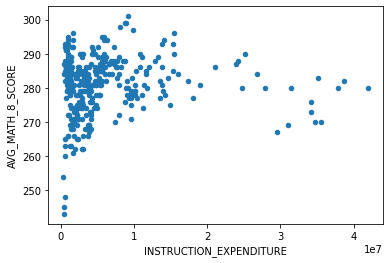

In [201]:
df.plot.scatter(x = 'INSTRUCTION_EXPENDITURE', y = 'AVG_MATH_8_SCORE')

In this graph I compared average math score for grade 8 with the money spent by instruction expenditure. I chose this beacuse I thought it was interesting to see if the total amount of money spent corrlated with the performance of the students. 

Visualization 2

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE', ylabel='AVG_READING_8_SCORE'>

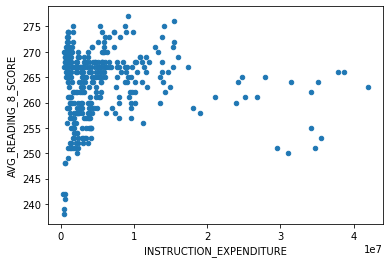

In [202]:
df.plot.scatter(x = 'INSTRUCTION_EXPENDITURE', y = 'AVG_READING_8_SCORE')

In this graph I compared state revenue with instruction expenditure. I chose this beacuse I thought that it would be interesting to compare the amount of money a state is bringing in vs the amount of money they are investing into school. This varies greatly from state to state I think this shows how much each individual state cares about educational performance. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
df = df.dropna()
X = df[['INSTRUCTION_EXPENDITURE']]
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.25, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Linear Regression

In [223]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [224]:
# create your model here

model = LinearRegression()

In [225]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.0018381258048728588

In [226]:
y_pred = model.predict(X_test)

In [227]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'AVG_MATH_8_SCORE')

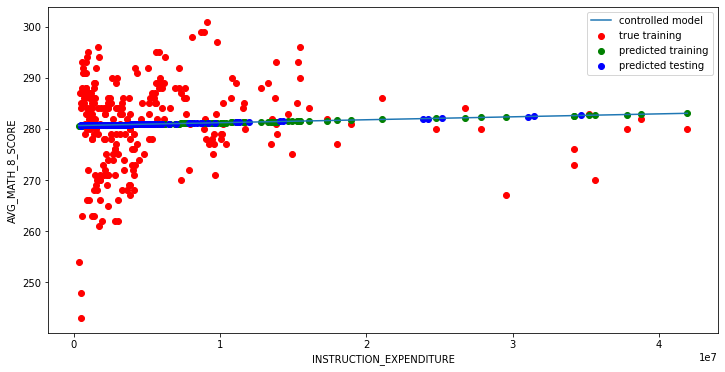

In [228]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')

<h2> Summary </h2>

From my charts I found above it is shown that the amount a state spends on their education correlates with the performance o their students on tests. The graphs show that the more a state spends leads to their students performing better and getting better grades. However, this is interesting because this is a logarithmic scale, at a certain point spending too much money does not lead to better grades. This means that to a certain extent investing in your states education will improve the intelligence of children, but past a certain point spending more will not cause the same impacts. 